In [115]:
from Bio import AlignIO
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [153]:
class Dist:
    
    def __init__(self, alignment):
        
        self.alignment = alignment
        self.distance_data = {}
    
    def pdistance(self, seq1, seq2):
        """
        calculates pairwise distance between two sequences
        """
        p = 0
        pairs = []
        for x in zip(seq1,seq2):
            if '-' not in x: pairs.append(x)
        for (x,y) in pairs:
            if x != y:
                p += 1
        length = len(pairs)
        return float(1 - p / length) # '1 minus the distance' is just for taking 'upside down' the plot for nice view
    
    
    def draw_simplot(self):
        """
        draws simplot
        takes distance_data from simgen
        """
        fig = plt.figure(figsize=(20, 8)) 
        ax = plt.axes() # to hide the x labels, as they are 'windows' 
    
        for key in self.distance_data.keys():
            plt.plot(self.distance_data[key], label=key)
    
        plt.setp(ax.get_xticklabels(), visible=False) # to hide the x labels
    
        plt.yticks(fontsize=20)
        plt.ylim(-0.1, 1.3)
        plt.title("simplot", fontsize=24)
        plt.xlabel("position in the alignment", fontsize=22)
        plt.ylabel("distance from the potential recombinant", fontsize=22)
    
        plt.legend(fontsize=15)
    
    def simgen(self, window, shift, pot_rec, region=False):
        
        self.distance_data.clear() # distance_data shouldn't grow
        
        if region:
            align = self.alignment[:, region[0] : region[1]]
        else:
            align = self.alignment
   
        parents = list(range(0, len(align)))
        parents.remove(pot_rec)
     
        align_length = len(align[0, :])
    
        for par in parents:
            dist_container = []
            start = 0
            finish = shift
            while start < align_length:
                seq1 = align[pot_rec, start:finish].seq # here is potential recombinant sequence slice
                seq2 = align[par, start:finish].seq  # here's parent
                dist = self.pdistance(seq1, seq2)
                dist_container.append(dist)
                start = start + shift
                finish = start + window
    
            self.distance_data[align[pot_rec].id + "_vs_" + align[par].id] = dist_container
    
        self.draw_simplot()
        
        
        
        
    def align_info(self):
        """
        to extraxt the inf about dimensions of the alignemtn 
        and the seqs ids
        """
        pass 
    
    def save_plot():
        
        pass
    
    def save_data():
        
        pass 
    

In [139]:
a = AlignIO.read("for_recan_lsdv.fasta", "fasta")

In [140]:
dist = Dist(a)

In [141]:
type(plotting)

__main__.Dist

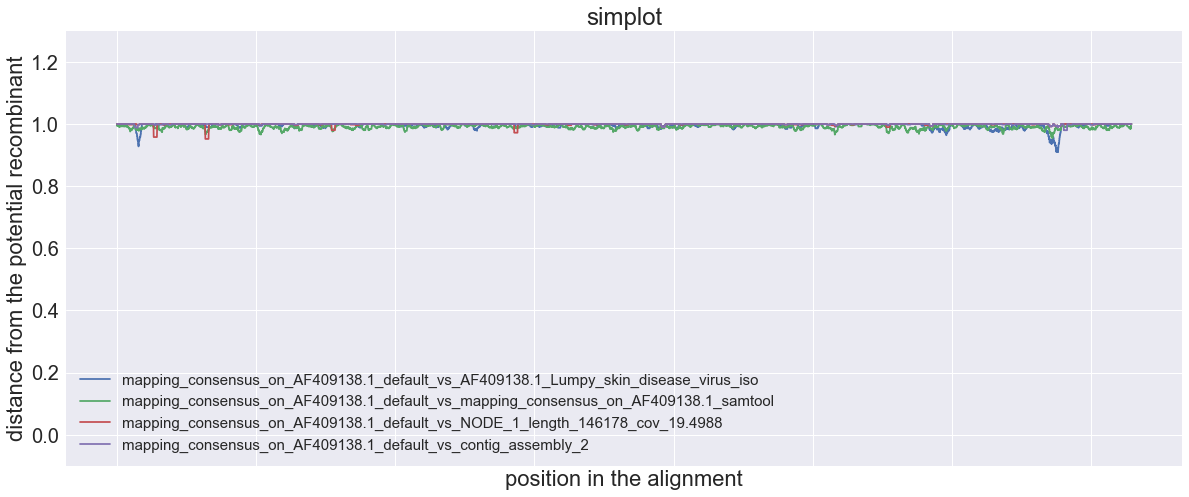

In [157]:
dist.simgen(window=500, shift=1, pot_rec=1)

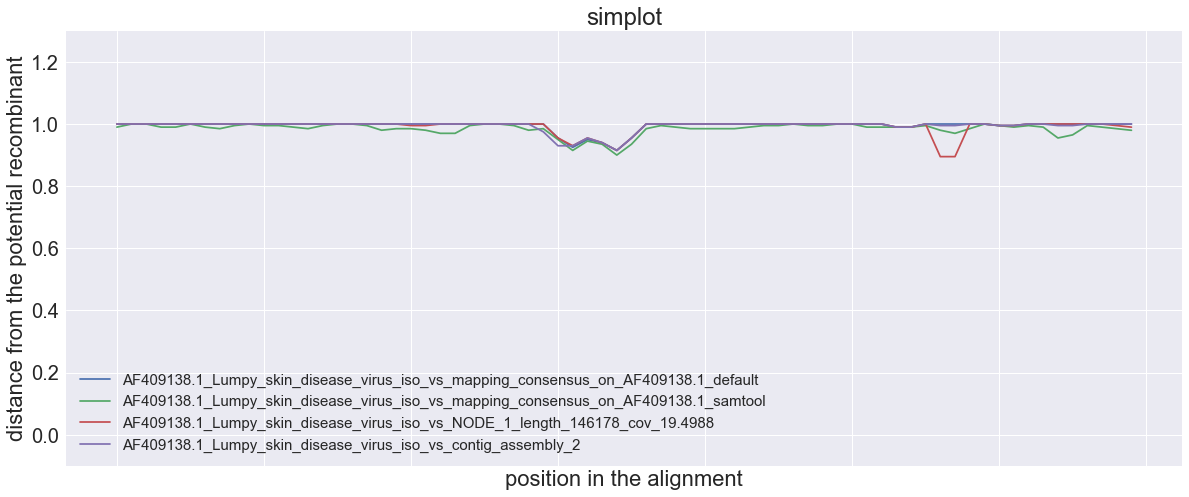

In [154]:
dist.simgen(region=(1, 7000), window=200, shift=100, pot_rec=0)

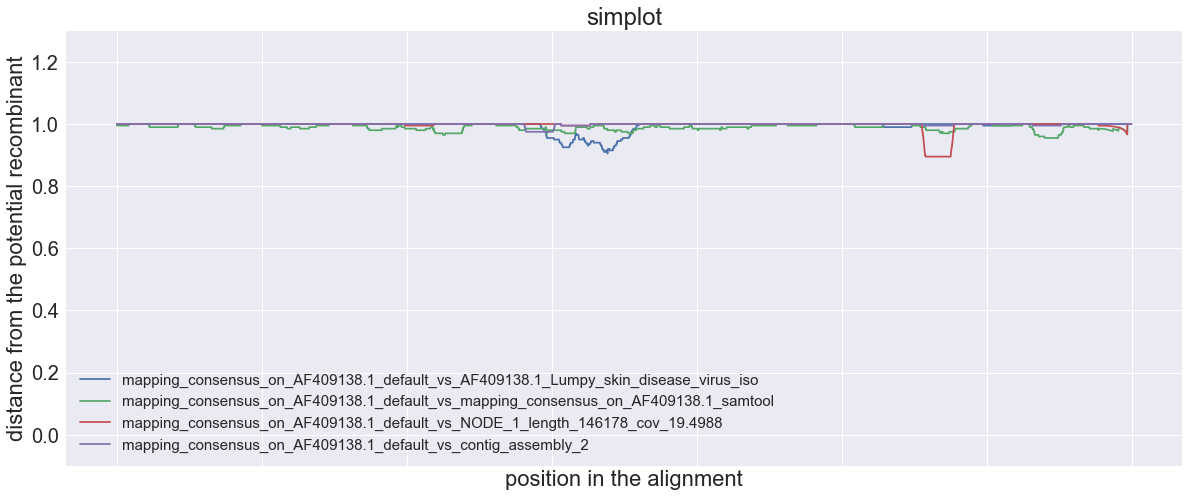

In [156]:
dist.simgen(region=(1, 7000), window=200, shift=1, pot_rec=1)

In [149]:
dist.distance_data

{}

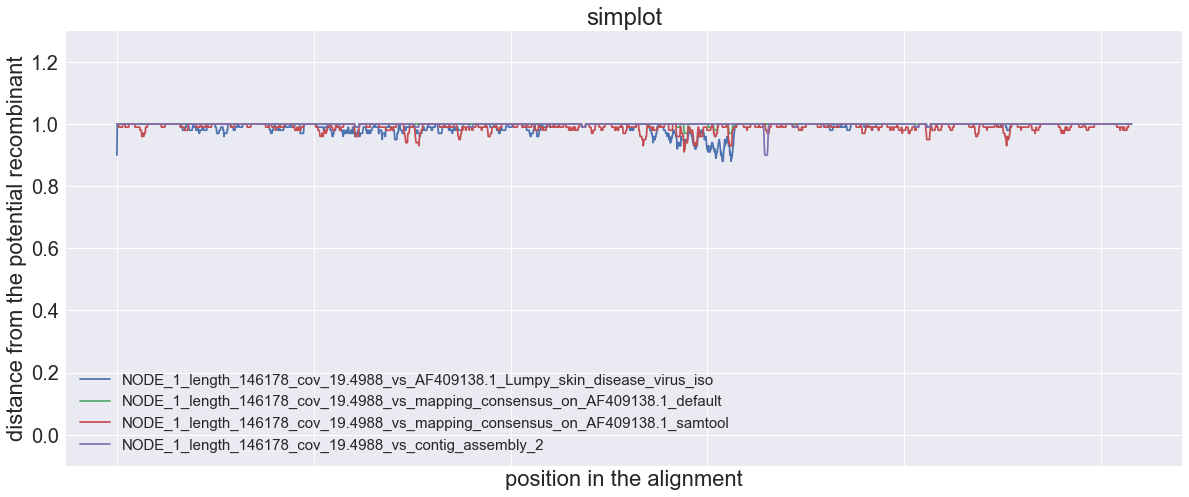

In [152]:
dist.simgen(window=100, shift=10, region=(120000, 150000), pot_rec=3)